<a href="https://colab.research.google.com/github/vicsladk/IBMTest/blob/main/Ford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Foco especial em carros Ford - Dados de vendas dos últimos anos**

*Conjunto de dados*

Este conjunto de dados contém preços de venda de revenda para carros Ford. Este é um conjunto de dados público disponível no site do Kaggle como Conjunto de Dados de Preços de Carros Ford sob a licença CC0: Domínio Público. O conjunto de dados foi ligeiramente modificado para os fins deste projeto.

In [9]:
# Inserir um banco de dados CSV
import pandas as pd
try:
    df_ford = pd.read_csv("/content/ford.csv")
    print("Arquivo CSV carregado com sucesso!")
    # Exibir as primeiras linhas do DataFrame
    print(df_ford.head())
except FileNotFoundError:
    print("Erro: O arquivo CSV não foi encontrado. Verifique o caminho do arquivo.")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o arquivo CSV: {e}")

print(f"Número de linhas: {len(df_ford)}")

Arquivo CSV carregado com sucesso!
     model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0   Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7         1.0
1    Focus  2018  14000       Manual     9083   Petrol  150  57.7         1.0
2    Focus  2017  13000       Manual    12456   Petrol  150  57.7         1.0
3   Fiesta  2019  17500       Manual    10460   Petrol  145  40.3         1.5
4   Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7         1.0
Número de linhas: 17966


## **limpeza de dados**

Verificar entradas duplicadas e valores ausentes

In [8]:
# Verificando linhas duplicadas
print("\nVerificando duplicatas:")
print(f"Número de linhas duplicadas antes da limpeza: {df_ford.duplicated().sum()}")

# Eliminar linhas duplicadas
df_ford.drop_duplicates(inplace=True)
print(f"Número de linhas duplicadas após a limpeza: {df_ford.duplicated().sum()}")

# Verificando valores ausentes
print("\nVerificando valores ausentes:")
print(df_ford.isnull().sum())

# Eliminando linhas com valores ausentes
df_ford.dropna(inplace=True)
print("\nValores ausentes após a remoção de linhas:")
print(df_ford.isnull().sum())

print("\nDataFrame após a limpeza:")
print(df_ford.head())
print(f"Novo número de linhas após a limpeza: {len(df_ford)}")


Verificando duplicatas:
Número de linhas duplicadas antes da limpeza: 154
Número de linhas duplicadas após a limpeza: 0

Verificando valores ausentes:
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Valores ausentes após a remoção de linhas:
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

DataFrame após a limpeza:
     model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0   Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7         1.0
1    Focus  2018  14000       Manual     9083   Petrol  150  57.7         1.0
2    Focus  2017  13000       Manual    12456   Petrol  150  57.7         1.0
3   Fiesta  2019  17500       Manual    10460   Petrol  145  40.3         1.5
4   Fiesta  2019  16500    Automatic 

# **Análise Exploratória**

a. Identificar o número de vendas para cada tipo de combustível

b. Identificar qual tipo de transmissão tem mais outliers de preço


Contagem de vendas por tipo de combustível:
fuelType
Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


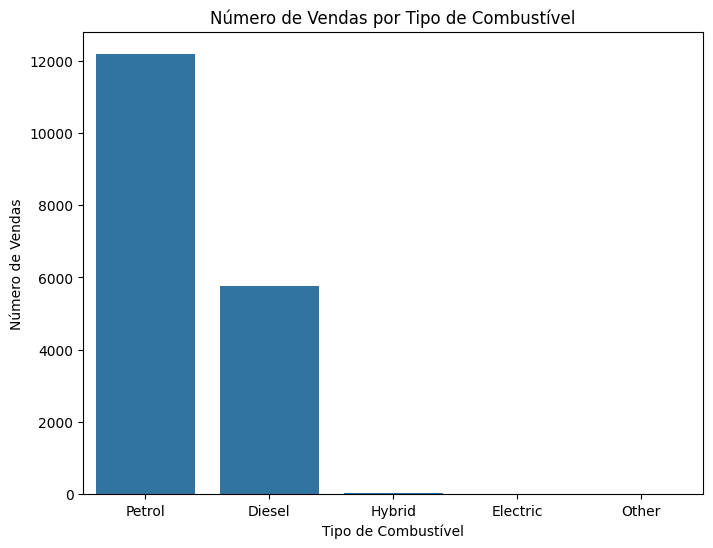


Análise de outliers de preço por tipo de transmissão:


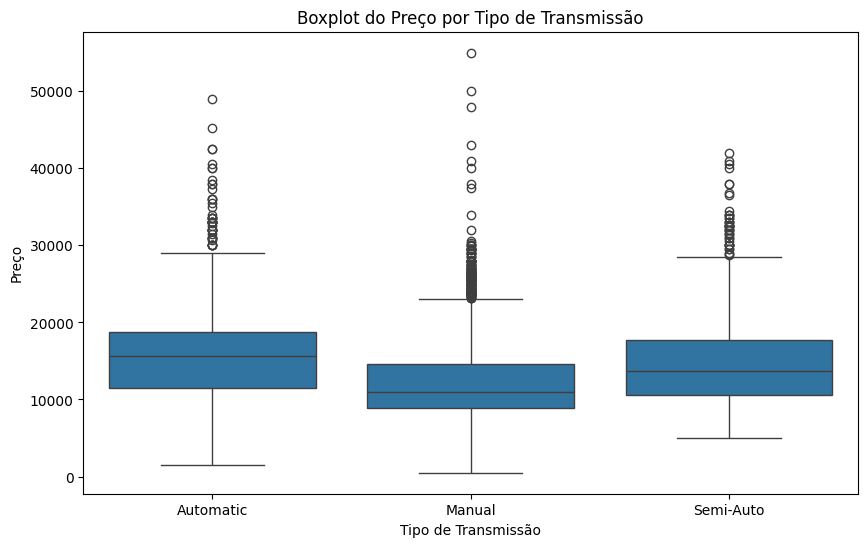


Número de outliers de preço por tipo de transmissão (IQR method):
Automatic: 46 outliers
Manual: 187 outliers
Semi-Auto: 42 outliers

O tipo de transmissão com mais outliers de preço é: Manual


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identificar o número de vendas para cada tipo de combustível
print("\nContagem de vendas por tipo de combustível:")
fuel_counts = df_ford['fuelType'].value_counts()
print(fuel_counts)

plt.figure(figsize=(8, 6))
sns.countplot(data=df_ford, x='fuelType', order=fuel_counts.index)
plt.title('Número de Vendas por Tipo de Combustível')
plt.xlabel('Tipo de Combustível')
plt.ylabel('Número de Vendas')
plt.show()


# Identificar qual tipo de transmissão tem mais outliers de preço
print("\nAnálise de outliers de preço por tipo de transmissão:")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_ford, x='transmission', y='price')
plt.title('Boxplot do Preço por Tipo de Transmissão')
plt.xlabel('Tipo de Transmissão')
plt.ylabel('Preço')
plt.show()

# Calcular o número de outliers para cada tipo de transmissão usando o método IQR
def count_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  return len(outliers)

transmission_types = df_ford['transmission'].unique()
outlier_counts = {}

for trans_type in transmission_types:
  subset_df = df_ford[df_ford['transmission'] == trans_type]
  num_outliers = count_outliers(subset_df, 'price')
  outlier_counts[trans_type] = num_outliers

print("\nNúmero de outliers de preço por tipo de transmissão (IQR method):")
for trans, count in outlier_counts.items():
  print(f"{trans}: {count} outliers")

most_outliers_transmission = max(outlier_counts, key=outlier_counts.get)
print(f"\nO tipo de transmissão com mais outliers de preço é: {most_outliers_transmission}")


Análise de venda com Ano de Fabricação, Milhas, Imposto Anual e Preço:


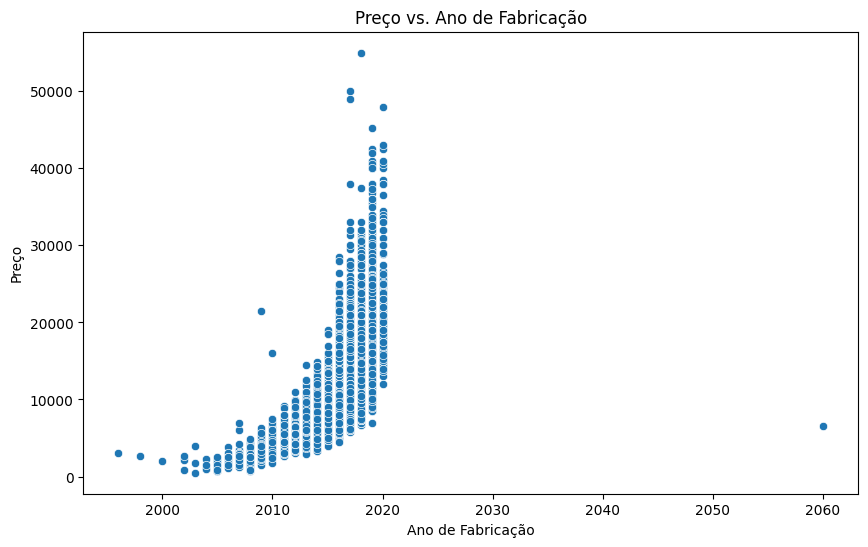

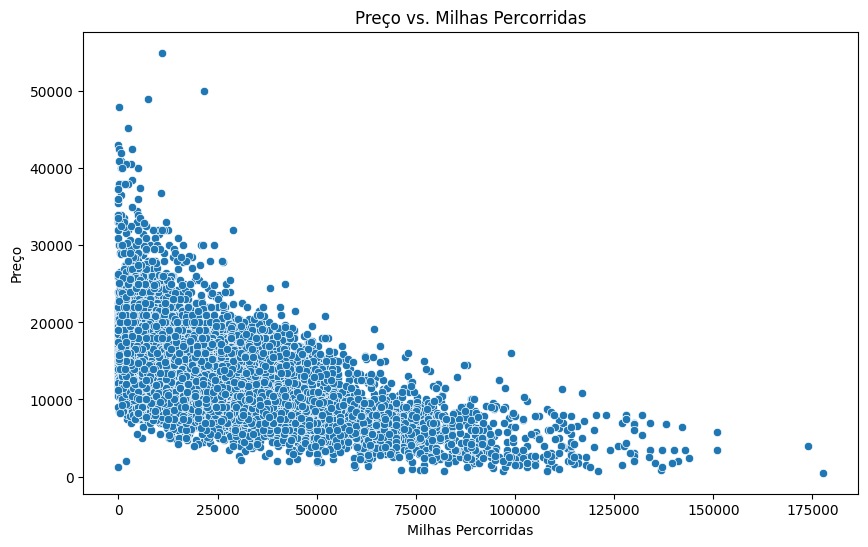

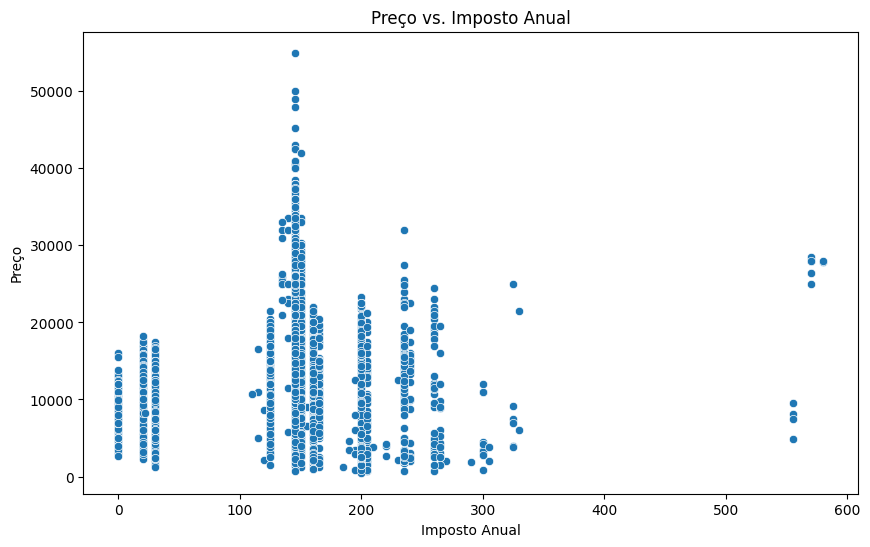

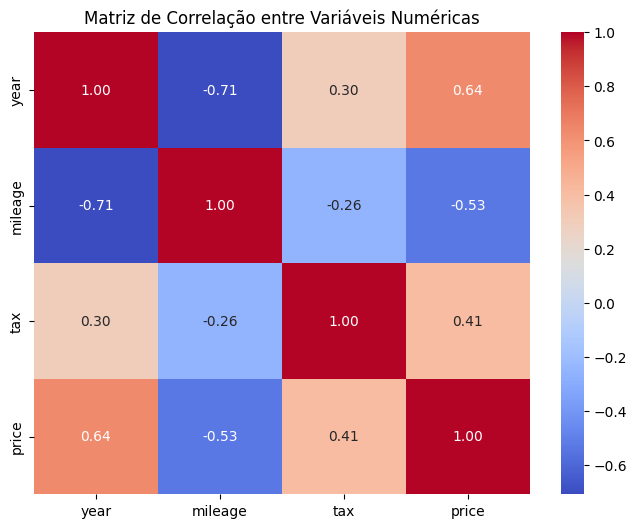

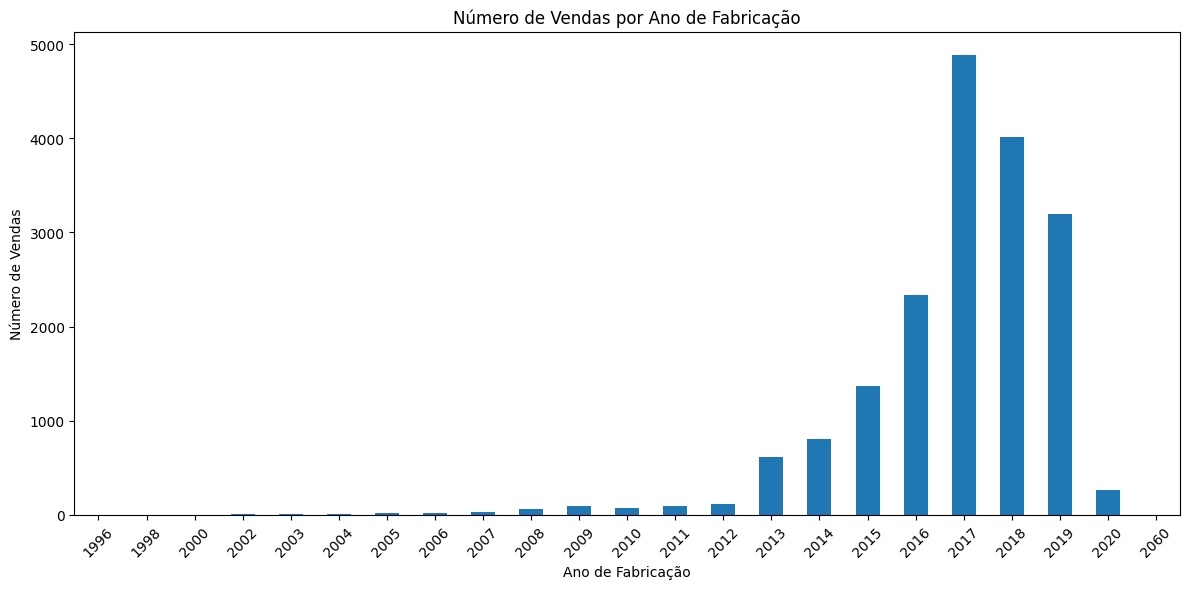

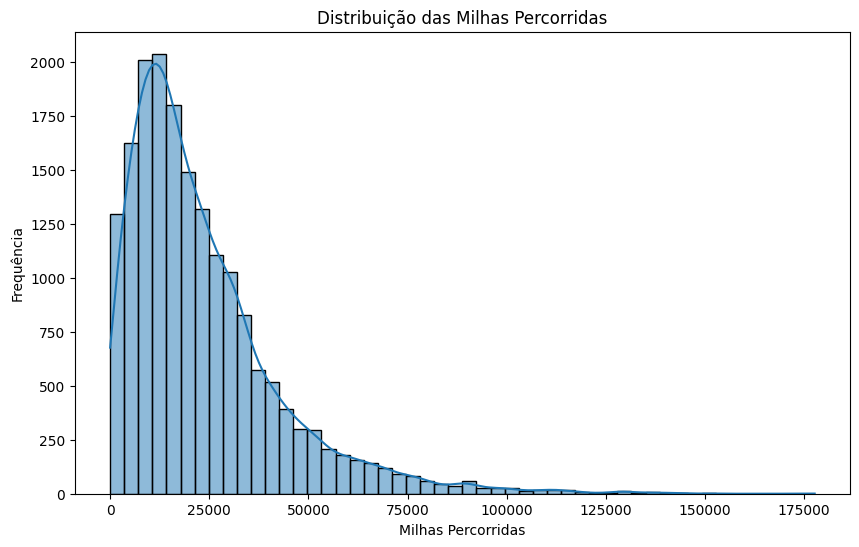

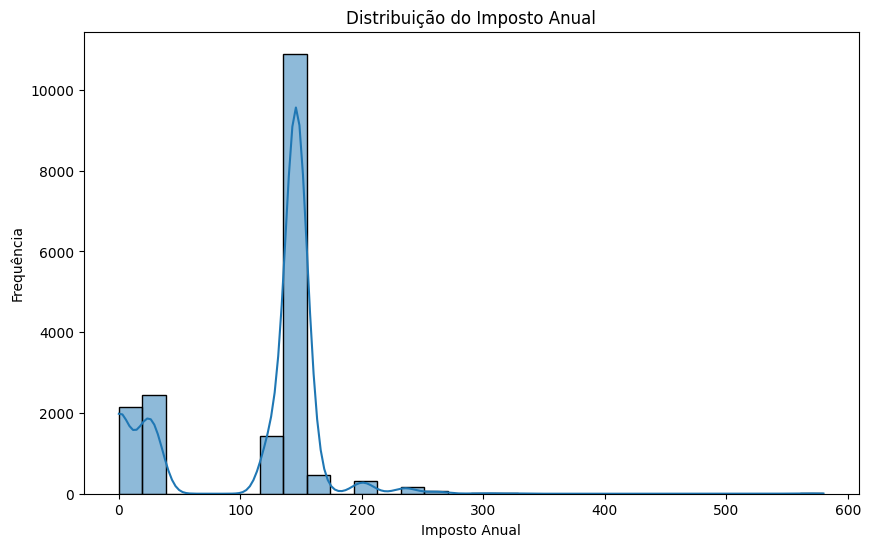


Contagem de vendas por tipo de transmissão:
transmission
Manual       15518
Automatic     1361
Semi-Auto     1087
Name: count, dtype: int64


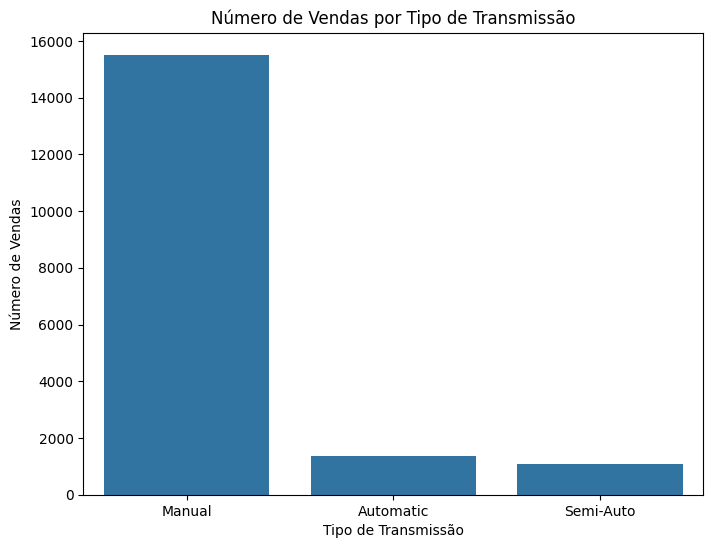

In [14]:
print("\nAnálise de venda com Ano de Fabricação, Milhas, Imposto Anual e Preço:")

# Relação entre Ano de Fabricação e Preço
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ford, x='year', y='price')
plt.title('Preço vs. Ano de Fabricação')
plt.xlabel('Ano de Fabricação')
plt.ylabel('Preço')
plt.show()

# Relação entre Milhas Percorridas e Preço
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ford, x='mileage', y='price')
plt.title('Preço vs. Milhas Percorridas')
plt.xlabel('Milhas Percorridas')
plt.ylabel('Preço')
plt.show()

# Relação entre Imposto Anual e Preço
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ford, x='tax', y='price')
plt.title('Preço vs. Imposto Anual')
plt.xlabel('Imposto Anual')
plt.ylabel('Preço')
plt.show()

# Matriz de Correlação entre as variáveis numéricas de interesse
numeric_cols = ['year', 'mileage', 'tax', 'price']
correlation_matrix = df_ford[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

# Análise de Venda ao longo dos anos
plt.figure(figsize=(12, 6))
sales_by_year = df_ford['year'].value_counts().sort_index()
sales_by_year.plot(kind='bar')
plt.title('Número de Vendas por Ano de Fabricação')
plt.xlabel('Ano de Fabricação')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análise da distribuição das Milhas Percorridas
plt.figure(figsize=(10, 6))
sns.histplot(data=df_ford, x='mileage', bins=50, kde=True)
plt.title('Distribuição das Milhas Percorridas')
plt.xlabel('Milhas Percorridas')
plt.ylabel('Frequência')
plt.show()

# Análise da distribuição do Imposto Anual
plt.figure(figsize=(10, 6))
sns.histplot(data=df_ford, x='tax', bins=30, kde=True)
plt.title('Distribuição do Imposto Anual')
plt.xlabel('Imposto Anual')
plt.ylabel('Frequência')
plt.show()

# Contagem de vendas por tipo de transmissão
print("\nContagem de vendas por tipo de transmissão:")
transmission_counts = df_ford['transmission'].value_counts()
print(transmission_counts)

# Opcional: Visualizar a contagem
plt.figure(figsize=(8, 6))
sns.countplot(data=df_ford, x='transmission', order=transmission_counts.index)
plt.title('Número de Vendas por Tipo de Transmissão')
plt.xlabel('Tipo de Transmissão')
plt.ylabel('Número de Vendas')
plt.show()

# **Comparar os modelos**

Utilizar regressões linear, polinomial e ridge em variáveis únicas e múltiplas para encontrar o modelo com melhor desempenho.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Separando as variáveis independentes (X) e dependente (y)
X = df_ford[['year', 'mileage', 'tax']]  # Variáveis múltiplas
X_year = df_ford[['year']]              # Variável única: year
X_mileage = df_ford[['mileage']]        # Variável única: mileage
X_tax = df_ford[['tax']]                # Variável única: tax
y = df_ford['price']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_year_train, X_year_test, y_year_train, y_year_test = train_test_split(X_year, y, test_size=0.2, random_state=42)
X_mileage_train, X_mileage_test, y_mileage_train, y_mileage_test = train_test_split(X_mileage, y, test_size=0.2, random_state=42)
X_tax_train, X_tax_test, y_tax_train, y_tax_test = train_test_split(X_tax, y, test_size=0.2, random_state=42)

# Dicionário para armazenar os resultados
results = {}

# Função para treinar e avaliar modelos
def train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  results[model_name] = {'MSE': mse, 'R2': r2}
  print(f"{model_name} - MSE: {mse:.2f}, R2: {r2:.2f}")

# Regressão Linear Simples (Variáveis únicas)
print("--- Regressão Linear Simples ---")
train_and_evaluate(LinearRegression(), X_year_train, X_year_test, y_year_train, y_year_test, 'Linear (Year)')
train_and_evaluate(LinearRegression(), X_mileage_train, X_mileage_test, y_mileage_train, y_mileage_test, 'Linear (Mileage)')
train_and_evaluate(LinearRegression(), X_tax_train, X_tax_test, y_tax_train, y_tax_test, 'Linear (Tax)')

# Regressão Linear Múltipla
print("\n--- Regressão Linear Múltipla ---")
train_and_evaluate(LinearRegression(), X_train, X_test, y_train, y_test, 'Linear (Multiple)')

# Regressão Polinomial (Grau 2)
print("\n--- Regressão Polinomial (Grau 2) ---")
poly_features = PolynomialFeatures(degree=2)

# Variáveis únicas
X_year_poly_train = poly_features.fit_transform(X_year_train)
X_year_poly_test = poly_features.transform(X_year_test)
train_and_evaluate(LinearRegression(), X_year_poly_train, X_year_poly_test, y_year_train, y_year_test, 'Polynomial (Year)')

X_mileage_poly_train = poly_features.fit_transform(X_mileage_train)
X_mileage_poly_test = poly_features.transform(X_mileage_test)
train_and_evaluate(LinearRegression(), X_mileage_poly_train, X_mileage_poly_test, y_mileage_train, y_mileage_test, 'Polynomial (Mileage)')

X_tax_poly_train = poly_features.fit_transform(X_tax_train)
X_tax_poly_test = poly_features.transform(X_tax_test)
train_and_evaluate(LinearRegression(), X_tax_poly_train, X_tax_poly_test, y_tax_train, y_tax_test, 'Polynomial (Tax)')

# Variáveis múltiplas
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)
train_and_evaluate(LinearRegression(), X_poly_train, X_poly_test, y_train, y_test, 'Polynomial (Multiple)')

# Regressão Ridge
print("\n--- Regressão Ridge ---")
# Variáveis únicas
train_and_evaluate(Ridge(alpha=1.0), X_year_train, X_year_test, y_year_train, y_year_test, 'Ridge (Year)')
train_and_evaluate(Ridge(alpha=1.0), X_mileage_train, X_mileage_test, y_mileage_train, y_mileage_test, 'Ridge (Mileage)')
train_and_evaluate(Ridge(alpha=1.0), X_tax_train, X_tax_test, y_tax_train, y_tax_test, 'Ridge (Tax)')

# Variáveis múltiplas
train_and_evaluate(Ridge(alpha=1.0), X_train, X_test, y_train, y_test, 'Ridge (Multiple)')


# Comparando os resultados para encontrar o melhor modelo
print("\n--- Resumo dos Resultados ---")
results_df = pd.DataFrame(results).T
print(results_df.sort_values(by='R2', ascending=False))

best_model_name = results_df['R2'].idxmax()
print(f"\nO modelo com melhor desempenho (maior R2) é: {best_model_name}")


--- Regressão Linear Simples ---
Linear (Year) - MSE: 13123822.33, R2: 0.41
Linear (Mileage) - MSE: 15969197.93, R2: 0.29
Linear (Tax) - MSE: 18802845.06, R2: 0.16

--- Regressão Linear Múltipla ---
Linear (Multiple) - MSE: 11731562.50, R2: 0.48

--- Regressão Polinomial (Grau 2) ---
Polynomial (Year) - MSE: 13226613.49, R2: 0.41
Polynomial (Mileage) - MSE: 15414792.09, R2: 0.31
Polynomial (Tax) - MSE: 18591556.41, R2: 0.17
Polynomial (Multiple) - MSE: 11431561.80, R2: 0.49

--- Regressão Ridge ---
Ridge (Year) - MSE: 13123813.32, R2: 0.41
Ridge (Mileage) - MSE: 15969197.93, R2: 0.29
Ridge (Tax) - MSE: 18802845.06, R2: 0.16
Ridge (Multiple) - MSE: 11731560.95, R2: 0.48

--- Resumo dos Resultados ---
                                MSE        R2
Polynomial (Multiple)  1.143156e+07  0.489937
Ridge (Multiple)       1.173156e+07  0.476551
Linear (Multiple)      1.173156e+07  0.476551
Ridge (Year)           1.312381e+07  0.414431
Linear (Year)          1.312382e+07  0.414430
Polynomial (Yea

# **Achar o melhor modelo**

Realizar uma Busca em Grade no modelo de regressão Ridge para identificar o hiperparâmetro ótimo do modelo para melhor desempenho.

In [13]:
from sklearn.model_selection import GridSearchCV

# Definir o espaço de hiperparâmetros para o Ridge (alpha)
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Configurar o GridSearchCV para o modelo Ridge com variáveis múltiplas
ridge_grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')

# Realizar a busca em grade nos dados de treino (variáveis múltiplas)
print("\n--- Realizando Busca em Grade para Ridge (Variáveis Múltiplas) ---")
ridge_grid_search.fit(X_train, y_train)

# Exibir o melhor hiperparâmetro encontrado e a melhor pontuação R2
print(f"Melhor hiperparâmetro alpha: {ridge_grid_search.best_params_['alpha']}")
print(f"Melhor pontuação R2 do treino (GridSearchCV): {ridge_grid_search.best_score_:.2f}")

# Avaliar o modelo Ridge com o melhor hiperparâmetro nos dados de teste
best_ridge_model = ridge_grid_search.best_estimator_
y_pred_best_ridge = best_ridge_model.predict(X_test)
mse_best_ridge = mean_squared_error(y_test, y_pred_best_ridge)
r2_best_ridge = r2_score(y_test, y_pred_best_ridge)

print(f"\nResultados do modelo Ridge otimizado (alpha={ridge_grid_search.best_params_['alpha']}) no conjunto de teste:")
print(f"MSE: {mse_best_ridge:.2f}")
print(f"R2: {r2_best_ridge:.2f}")

# Atualizar o dicionário de resultados com o melhor modelo Ridge encontrado
results['Ridge (Multiple, Optimized)'] = {'MSE': mse_best_ridge, 'R2': r2_best_ridge}

# Comparar os resultados novamente, incluindo o modelo Ridge otimizado
print("\n--- Resumo dos Resultados (com Ridge Otimizado) ---")
results_df = pd.DataFrame(results).T
print(results_df.sort_values(by='R2', ascending=False))

best_overall_model_name = results_df['R2'].idxmax()
print(f"\nO modelo com melhor desempenho geral (maior R2) é: {best_overall_model_name}")



--- Realizando Busca em Grade para Ridge (Variáveis Múltiplas) ---
Melhor hiperparâmetro alpha: 100
Melhor pontuação R2 do treino (GridSearchCV): 0.46

Resultados do modelo Ridge otimizado (alpha=100) no conjunto de teste:
MSE: 11731437.02
R2: 0.48

--- Resumo dos Resultados (com Ridge Otimizado) ---
                                      MSE        R2
Polynomial (Multiple)        1.143156e+07  0.489937
Ridge (Multiple, Optimized)  1.173144e+07  0.476557
Ridge (Multiple)             1.173156e+07  0.476551
Linear (Multiple)            1.173156e+07  0.476551
Ridge (Year)                 1.312381e+07  0.414431
Linear (Year)                1.312382e+07  0.414430
Polynomial (Year)            1.322661e+07  0.409844
Polynomial (Mileage)         1.541479e+07  0.312210
Ridge (Mileage)              1.596920e+07  0.287473
Linear (Mileage)             1.596920e+07  0.287473
Polynomial (Tax)             1.859156e+07  0.170466
Ridge (Tax)                  1.880285e+07  0.161039
Linear (Tax)         

*Refere-se ao modelo de Regressão Linear treinado em variáveis múltiplas ('year', 'mileage', 'tax') que foram transformadas usando características polinomiais de grau 2.*

# **Cenários**



1.   Anos mais recentes
2.   Baixa quilometragem
3.   Imposto anual mais alto
4.   Combustível Petróleo
5.   Transmissão Manual

